<a href="https://colab.research.google.com/github/Aayush-Borkar/ML-Lab/blob/main/ML_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


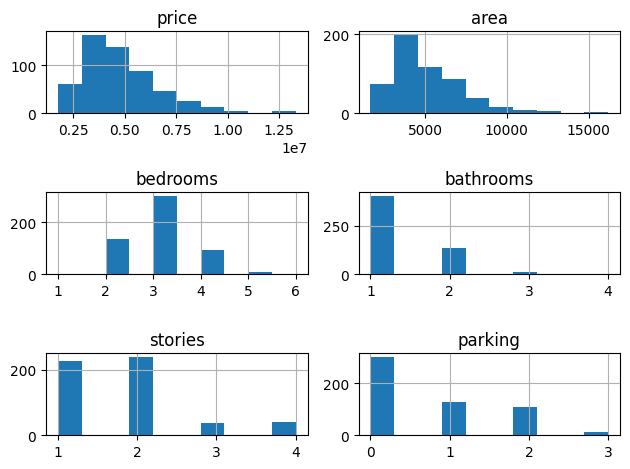

In [3]:
df.hist()
plt.tight_layout()
plt.show()

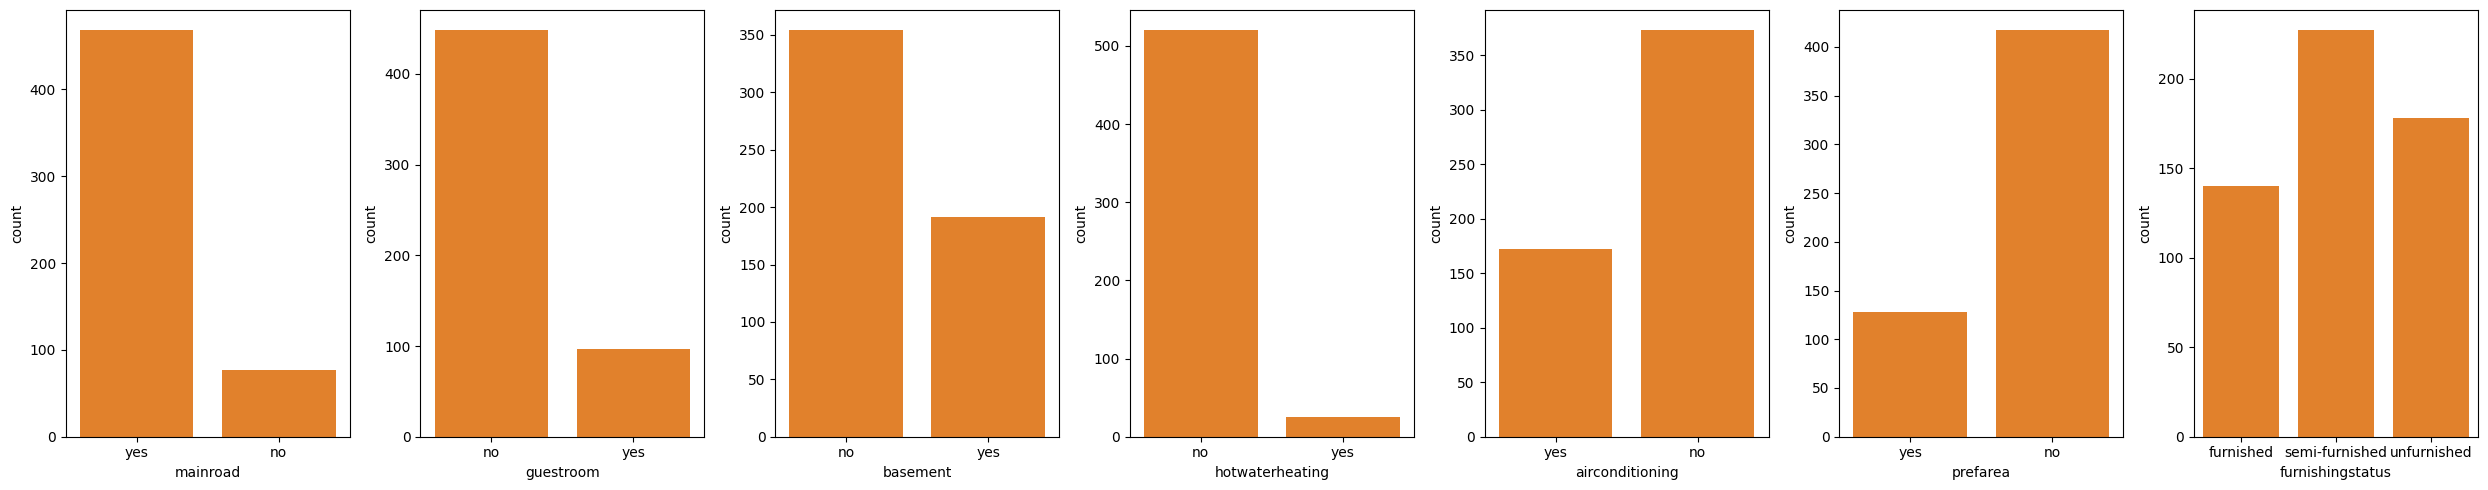

In [4]:
import seaborn as sb

def plot_cat(dataset, feature):
    sb.countplot(data = dataset, x = feature)
    ax = sb.countplot(data = dataset, x = feature)

plt.figure(figsize = (25,5))

plt.subplot(1,7,1)
plot_cat(df, 'mainroad')

plt.subplot(1,7,2)
plot_cat(df, 'guestroom')

plt.subplot(1,7,3)
plot_cat(df, 'basement')

plt.subplot(1,7,4)
plot_cat(df, 'hotwaterheating')

plt.subplot(1,7,5)
plot_cat(df, 'airconditioning')

plt.subplot(1,7,6)
plot_cat(df, 'prefarea')

plt.subplot(1,7,7)
plot_cat(df, 'furnishingstatus')

plt.tight_layout()
plt.show()

<Axes: xlabel='area'>

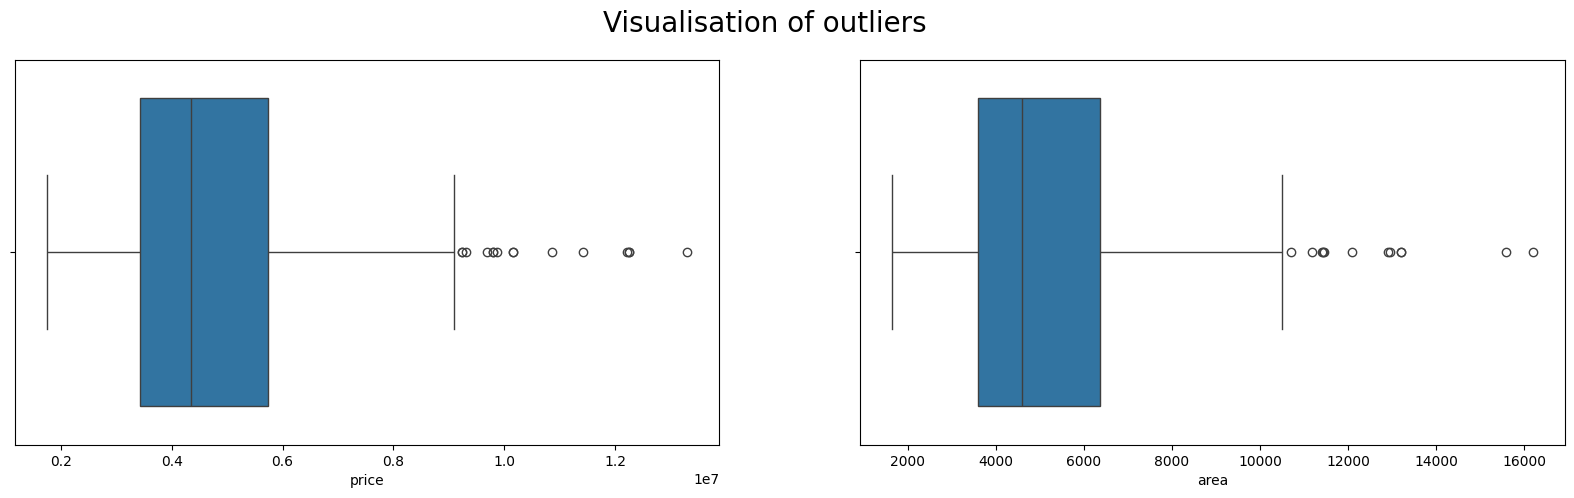

In [5]:
fig = plt.figure(figsize = (20,5))
fig.suptitle('Visualisation of outliers', size = 20)

axes = fig.add_subplot(1, 2, 1)
sb.boxplot(x = df['price'])

axes = fig.add_subplot(1, 2, 2)
sb.boxplot(x = df['area'])

In [6]:
(df['price'] > 9000000).sum()
(df['area'] > 10000).sum()

18

In [7]:
df_cleaned = df[(df['price'] < 9000000) & (df['area'] < 10000)]

In [8]:
df_cleaned.replace({'yes': 1, 'no': 0}, inplace = True)
df_cleaned.head(10)

<ipython-input-8-29c79dd03ad5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.replace({'yes': 1, 'no': 0}, inplace = True)
<ipython-input-8-29c79dd03ad5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace({'yes': 1, 'no': 0}, inplace = True)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished
25,8540000,6540,4,2,2,1,1,1,0,1,2,1,furnished
26,8463000,6000,3,2,4,1,1,1,0,1,0,1,semi-furnished


In [9]:
df_cleaned['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [10]:
df_dummies = df_cleaned.copy()

In [11]:
df_dummies['fs_furnished'] = [1 if i == 'furnished' else 0 for i in df_dummies['furnishingstatus']]
df_dummies['fs_semi_furnished'] = [1 if i == 'semi-furnished' else 0 for i in df_dummies['furnishingstatus']]
df_dummies['fs_unfurnished'] = [1 if i == 'unfurnished' else 0 for i in df_dummies['furnishingstatus']]
df_dummies.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,fs_furnished,fs_semi_furnished,fs_unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,1,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,1,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,0,1,0
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished,0,1,0
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished,0,0,1
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished,1,0,0
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished,1,0,0
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished,1,0,0
25,8540000,6540,4,2,2,1,1,1,0,1,2,1,furnished,1,0,0
26,8463000,6000,3,2,4,1,1,1,0,1,0,1,semi-furnished,0,1,0


In [12]:
df_dummies.drop('furnishingstatus', axis = 1, inplace = True)

In [13]:
from matplotlib import style

corr_price = df_dummies.corr()
corr_price[['price']].sort_values('price', ascending = False).style.background_gradient()

,price
price,1.000000
area,0.546181
airconditioning,0.477411
bathrooms,0.470515
stories,0.453392
bedrooms,0.326811
parking,0.316109
mainroad,0.307422
guestroom,0.301487
prefarea,0.280157


In [15]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting':GradientBoostingRegressor(),
    'Ridge Regression': Ridge(),
    "SVR":SVR()
}

In [18]:
msk = np.random.rand(len(df_dummies)) < 0.8
train = df_dummies[msk]
test = df_dummies[~msk]

In [21]:
x_train = np.asanyarray(train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
                               'guestroom', 'airconditioning', 'fs_unfurnished']])
y_train = np.asanyarray(train[['price'] ])

In [22]:
x_test = np.asanyarray(test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
                             'guestroom', 'airconditioning', 'fs_unfurnished']])
y_test = np.asanyarray(test[['price']])

In [23]:
n = 1
best_r2 = -1

for name, model in models.items():
    pipe = make_pipeline(model)

    # Fit the pipeline
    model = pipe.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    print(f'{n} :- {name} - Test R2: {r2_score(y_test, y_pred):.4f}')
    print(f'     {name} - Training R2: {r2_score(y_train, y_pred_train):.4f}\n')
    print(f'     → MSE: {mean_squared_error(y_test, y_pred):.4f}')
    print(f'     → RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')
    print(f'     → MAE: {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'     → MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}\n')
    n += 1
    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name

print(f"♦ Best Model based on Test R2:\n{best_model_name} ({best_r2:.4f})")

1 :- Linear Regression - Test R2: 0.6832
     Linear Regression - Training R2: 0.6105

     → MSE: 797455292935.7953
     → RMSE: 893003.5235
     → MAE: 705396.6057
     → MAPE: 0.1770

2 :- Random Forest - Test R2: 0.5447
     Random Forest - Training R2: 0.9307

     → MSE: 1146055639680.6692
     → RMSE: 1070539.8823
     → MAE: 813301.5310
     → MAPE: 0.2093

3 :- Gradient Boosting - Test R2: 0.6453
     Gradient Boosting - Training R2: 0.8055

     → MSE: 892646102702.8568
     → RMSE: 944799.5040
     → MAE: 730238.1893
     → MAPE: 0.1907

4 :- Ridge Regression - Test R2: 0.6832
     Ridge Regression - Training R2: 0.6104

     → MSE: 797476785472.8728
     → RMSE: 893015.5572
     → MAE: 705714.4436
     → MAPE: 0.1772

5 :- SVR - Test R2: -0.0105
     SVR - Training R2: -0.0376

     → MSE: 2543316201983.0684
     → RMSE: 1594777.7908
     → MAE: 1237542.4569
     → MAPE: 0.3024

♦ Best Model based on Test R2:
Linear Regression (0.6832)
